# TRABALHO DE IAA015 – Tópicos de Inteligência Artificial

## Equipe 03
* Gustavo Costa de Souza
* Marcos Vinicius de Melo
* Marcus Eneas Silveira Galvao do Rio Apa II
* Patrícia Verdugo Pascoal
* Rodrigo de Araujo
* William de Souza Alencar

Este trabalho deve ser realizado em equipes de 3 a 6 integrantes. 
Adicionar o NOME COMPLETO de todos os integrantes da equipe. 
Entregar como um documento PDF com todas as respostas. 
 
ATENÇÃO:  É  UM  trabalho  nessa  disciplina  formado  por  DOIS  exercícios:  (1)  algoritmo  genético;  (2) 
visualização com a PCA de dois modelos vetoriais do mesmo texto. 
 
Cada questão tem o peso de 50% da nota. 

1) Algoritmo Genético  
Problema do Caixeiro Viajante 
 
A Solução poderá ser apresentada em: Python (preferencialmente), ou em R, ou em Matlab, ou em C ou 
em Java. 
 
Considere o seguinte problema de otimização (a escolha do número de 100 cidades foi feita simplesmente 
para tornar o problema intratável. A solução ótima para este problema não é conhecida). 
 
Suponha  que  um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
distância que passe uma única vez por todas as cidades e retorne à cidade de origem. 
 
Para  tornar  a  coisa  mais  interessante,  as  coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), 
considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 
pixels. 
 
O  relatório  deverá  conter  no  mínimo  a  primeira  melhor  solução  (obtida  aleatoriamente  na  geração  da 
população inicial) e a melhor solução obtida após um número mínimo de 1000 gerações. Gere as imagens 
em 2d dos pontos (cidades) e do caminho. 
 
Sugestão:  
(1) considere o cromossomo formado pelas cidades, onde a cidade de início (escolhida 
aleatoriamente) deverá estar na posição 0 e 100 e a ordem das cidades visitadas nas posições de 
1 a 99 deverão ser definidas pelo algoritmo genético. 
(2) A função de avaliação deverá minimizar a distância euclidiana entre as cidades (os pontos). 
(3) Utilize no mínimo uma população com 100 indivíduos; 
(4) Utilize no mínimo 1% de novos indivíduos obtidos pelo operador de mutação; 
(5) Utilize no mínimo de 90% de novos indivíduos obtidos pelo método de cruzamento (crossover-
ox); 
(6) Preserve sempre a melhor solução de uma geração para outra. 
 
Importante: A solução deverá implementar os operadores de “cruzamento” e “mutação”.

In [17]:
import math
import matplotlib.pyplot as plt
import random

#setar seed para reprodutibilidade
random.seed(42)

# constantes
num_cidades = 100

# lista com as coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 pixels.
def gerar_coordenadas(num_cidades):
    coordenadas = []
    for _ in range(num_cidades):
        x = random.randint(0, num_cidades)
        y = random.randint(0, num_cidades)
        coordenadas.append((x, y))
    return coordenadas

coordenadas_cidades = gerar_coordenadas(num_cidades)
print(coordenadas_cidades)


[(81, 14), (3, 94), (35, 31), (28, 17), (94, 13), (86, 94), (69, 11), (75, 54), (4, 3), (11, 27), (29, 64), (77, 3), (71, 25), (91, 83), (89, 69), (53, 28), (57, 75), (35, 0), (97, 20), (89, 54), (43, 35), (19, 27), (97, 43), (13, 11), (48, 12), (45, 44), (77, 33), (5, 93), (58, 68), (15, 48), (10, 70), (37, 80), (79, 46), (73, 24), (90, 8), (5, 84), (29, 98), (37, 10), (29, 12), (48, 35), (58, 81), (46, 20), (47, 45), (26, 85), (34, 89), (87, 82), (9, 77), (81, 21), (68, 93), (31, 20), (59, 48), (34, 81), (88, 71), (28, 87), (41, 98), (99, 7), (29, 4), (40, 51), (34, 8), (27, 72), (91, 40), (27, 83), (63, 50), (82, 58), (18, 33), (17, 31), (95, 71), (68, 33), (95, 74), (54, 74), (51, 46), (28, 17), (65, 63), (11, 96), (6, 14), (19, 80), (20, 87), (54, 76), (8, 49), (48, 76), (59, 67), (32, 70), (1, 87), (92, 14), (87, 68), (96, 34), (98, 82), (43, 14), (37, 55), (20, 58), (0, 92), (92, 33), (64, 97), (22, 64), (13, 80), (38, 81), (64, 77), (25, 19), (47, 97), (20, 69)]


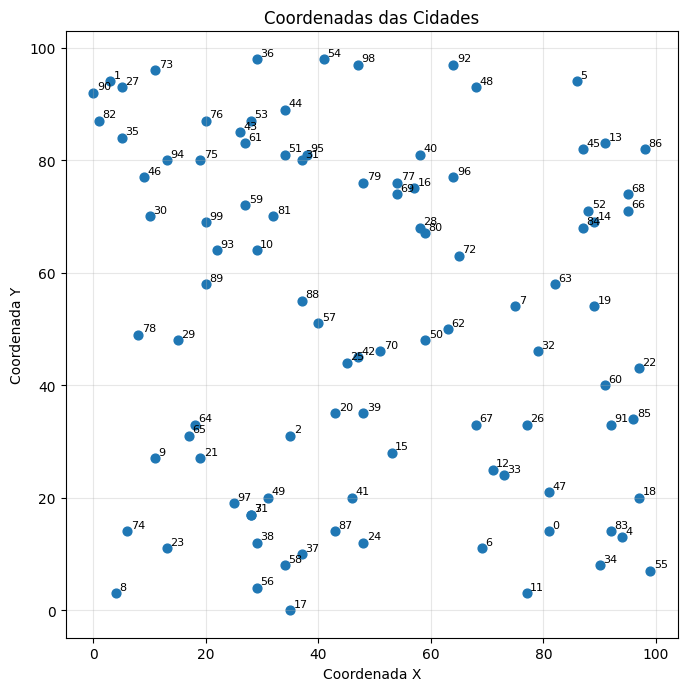

In [18]:
# plotar coordenadas_cidades
xs, ys = zip(*coordenadas_cidades)

plt.figure(figsize=(7,7))
plt.scatter(xs, ys, color='tab:blue', s=40)
for i, (x, y) in enumerate(coordenadas_cidades):
    plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)  # rótulo com índice da cidade

plt.title("Coordenadas das Cidades")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [19]:
# um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
# então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
# distância que passe uma única vez por todas as cidades e retorne à cidade de origem

def calcular_distancia(cidade1, cidade2):
    return math.sqrt((cidade1[0] - cidade2[0]) ** 2 + (cidade1[1] - cidade2[1]) ** 2)

def calcular_percurso_total(percurso, coordenadas):
    distancia_total = 0
    for i in range(len(percurso) - 1):
        distancia_total += calcular_distancia(coordenadas[percurso[i]], coordenadas[percurso[i + 1]])
    distancia_total += calcular_distancia(coordenadas[percurso[-1]], coordenadas[percurso[0]])
    return distancia_total

In [20]:
# (3) Utilize no mínimo uma população com 100 indivíduos
TAMANHO_POPULACAO = 100
NUMERO_GERACOES = 5000

# (1) considere o cromossomo formado pelas cidades, onde a cidade de início (escolhida 
# aleatoriamente) deverá estar na posição 0 e 100 e a ordem das cidades visitadas nas posições de 
# 1 a 99 deverão ser definidas pelo algoritmo genético.
def populacaoInicial(tamanho, coordenadas_cidades):
    resultado = []
    n = len(coordenadas_cidades)
    for _ in range(tamanho):
        cidades_intermediarias = list(range(1, n))  # cidades 1 até n-1
        random.shuffle(cidades_intermediarias)
        rota = [0] + cidades_intermediarias + [0]   # começa e termina na cidade 0
        resultado.append(rota)
    return resultado

# (2) A função de avaliação deverá minimizar a distância euclidiana entre as cidades (os pontos).
def avaliacao(populacao, coordenadas_cidades):
  fit = []
  for v in populacao:
    fx = calcular_percurso_total(v, coordenadas_cidades)
    if fx == 0:
      fit.append( 999999 )
    else:
      fit.append( abs(1/fx) )
  return fit

def preservaMelhor(geracao, nova, coordenadas_cidades):
  ava = avaliacao(geracao, coordenadas_cidades)
  maior = 0
  for i in range(1,len(ava)):
    #print(f'comparando {maior} ({geracao[maior]} : {ava[maior]}) com {i} ({geracao[i]} :{ava[i]}) ')
    if ava[maior] < ava[i]:
      maior = i
  nova.append( geracao[maior] )
  #print('melhor: ', nova, geracao[maior])
  return geracao[maior]

def order_crossover(p1, p2):
    # Order Crossover (OX) para permutações (rotas) sem loop infinito.
    # Mantém posições 0 e -1 (origem/retorno) e realiza OX entre 1..n-2.

    n = len(p1)
    # inicializa filho preservando primeiro/último se presentes
    filho = [-1] * n
    filho[0] = p1[0]
    filho[-1] = p1[-1]

    # escolhe cortes entre 1 e n-2 (inclusive)
    corte1, corte2 = sorted(random.sample(range(1, n - 2), 2))

    # copia segmento do pai1
    filho[corte1:corte2 + 1] = p1[corte1:corte2 + 1]

    # prepara lista de posições a preencher (em ordem)
    posicoes_para_preencher = list(range(1, corte1)) + list(range(corte2 + 1, n - 1))
    # print(f'n: {n} cortes: {corte1}, {corte2}, posicoes_para_preencher: {posicoes_para_preencher}')

    # coleta genes de p2 (na ordem) que ainda não estão no filho
    genes_para_inserir = [g for g in p2[1:-1] if g not in filho]

    # preenche o filho nas posições restantes, sem deixar -1
    for pos, gene in zip(posicoes_para_preencher, genes_para_inserir):
        filho[pos] = gene

    return filho

def cruzamento(pop, qdade, nova):
    # Gera `qdade` filhos válidos a partir da população `pop` usando OX.
    # Adiciona os filhos na lista `nova`.

    qdeSaida = len(nova) + qdade
    while len(nova) < qdeSaida:
        indA, indB = random.sample(range(len(pop)), 2)
        p1 = pop[indA]
        p2 = pop[indB]
        # gera dois filhos (troca ordem dos pais)
        f1 = order_crossover(p1, p2)
        f2 = order_crossover(p2, p1)
        nova.append(f1)
        if len(nova) < qdeSaida:
            nova.append(f2)

def mutacao(pop, qdade, nova):

    # Mutação com seleção por roleta (fitness-proporcional).
    # Seleciona pais com probabilidade proporcional à avaliação e aplica swap mutation
    qdeSaida = len(nova) + qdade
    n = len(pop[0])
    fits = avaliacao(pop, coordenadas_cidades)
    # se todas as fitness forem zero, usa seleção uniforme
    if sum(fits) == 0:
        weights = None
    else:
        weights = fits
    while len(nova) < qdeSaida:
        pai = random.choices(pop, weights=weights, k=1)[0]
        filho = pai.copy()
        # evita trocar a posição 0 e a última (manter cidade de origem no início/fim)
        i, j = random.sample(range(1, n-1), 2)
        filho[i], filho[j] = filho[j], filho[i]
        nova.append(filho)

In [21]:
# passo 1
p0 = populacaoInicial(TAMANHO_POPULACAO, coordenadas_cidades)
print("Pop inicial: ", p0)

# avalia a pop. inicial
a0 = avaliacao(p0, coordenadas_cidades)
print("Avaliação", a0)

# fazemos a iteração, passos 3,4 e 5 do AG
geracao = p0
numGeracoes = NUMERO_GERACOES
while numGeracoes>0:
  nova = []

  # (6) Preserve sempre a melhor solução de uma geração para outra.
  preservaMelhor(geracao, nova, coordenadas_cidades)

  # (5) Utilize no mínimo de 90% de novos indivíduos obtidos pelo método de cruzamento (crossover-ox);
  qtd_cruzamento = int(0.90 * TAMANHO_POPULACAO)
  cruzamento(geracao, qtd_cruzamento, nova)

  # (4) Utilize no mínimo 1% de novos indivíduos obtidos pelo operador de mutação;
  qtd_mutacao = max(1, int(0.01 * TAMANHO_POPULACAO))
  mutacao(geracao, qtd_mutacao, nova)
  # completa até o tamanho desejado
  while len(nova) < TAMANHO_POPULACAO:
      cruzamento(geracao, qtd_cruzamento, nova)

  numGeracoes = numGeracoes - 1

  av = avaliacao(nova, coordenadas_cidades)

  # ordena a geracao com base na avaliacao
  nova2 = sorted(zip(av,nova),reverse=True)
  geracao = [x for _,x in nova2]

  # imprime a melhor solução a cada 100 gerações
  if numGeracoes % 100 == 0:
    print( f'Geracao {numGeracoes} melhor = {calcular_percurso_total(geracao[0], coordenadas_cidades)}' )

print(f'A primeira melhor solucao encontrada: {calcular_percurso_total(geracao[-1], coordenadas_cidades)}, {geracao[-1]}')
print(f'A melhor solucao encontrada: distancia = {calcular_percurso_total(geracao[0], coordenadas_cidades)}, {geracao[0]}')

Pop inicial:  [[0, 44, 6, 45, 54, 19, 96, 80, 10, 7, 92, 89, 56, 25, 24, 39, 20, 85, 51, 23, 30, 21, 29, 60, 49, 78, 87, 12, 72, 82, 76, 50, 13, 27, 66, 43, 88, 37, 83, 35, 14, 64, 18, 65, 33, 75, 79, 94, 53, 74, 4, 41, 46, 62, 98, 67, 59, 84, 36, 38, 2, 97, 5, 93, 32, 16, 58, 57, 48, 52, 91, 26, 70, 28, 55, 99, 34, 22, 71, 61, 81, 17, 69, 9, 95, 86, 11, 73, 90, 8, 31, 40, 47, 15, 3, 63, 42, 77, 1, 68, 0], [0, 58, 13, 43, 24, 35, 29, 45, 51, 23, 81, 69, 94, 96, 54, 30, 32, 67, 18, 61, 77, 19, 76, 73, 98, 46, 75, 11, 15, 10, 36, 86, 9, 88, 42, 85, 47, 14, 17, 64, 82, 83, 48, 27, 60, 40, 3, 56, 74, 92, 80, 68, 26, 16, 44, 57, 39, 5, 95, 79, 6, 33, 66, 4, 21, 65, 90, 99, 71, 41, 78, 97, 87, 89, 38, 25, 20, 91, 72, 55, 37, 59, 34, 50, 1, 49, 93, 8, 52, 28, 62, 63, 53, 22, 31, 12, 2, 70, 84, 7, 0], [0, 19, 29, 99, 52, 50, 31, 73, 69, 93, 25, 64, 30, 72, 81, 39, 75, 97, 58, 41, 91, 67, 46, 8, 32, 49, 13, 4, 45, 26, 76, 70, 42, 90, 22, 61, 68, 47, 79, 11, 48, 59, 40, 86, 60, 53, 80, 74, 16, 8

In [22]:
def plotar_geracao(melhor_rota, coordenadas_cidades, titulo, color_line):
    xs_melhor_rota = [coordenadas_cidades[i][0] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][0]]
    ys_melhor_rota = [coordenadas_cidades[i][1] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][1]]
    plt.figure(figsize=(7,7))
    plt.plot(xs_melhor_rota, ys_melhor_rota, '-o', color=color_line, alpha=0.8)
    plt.scatter(xs, ys, color='tab:blue', s=40)
    for i, (x, y) in enumerate(coordenadas_cidades):
        plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)
    distancia_melhor = calcular_percurso_total(melhor_rota, coordenadas_cidades)
    plt.title(f"{titulo} - Distância ≈ {distancia_melhor:.2f}")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(alpha=0.3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()

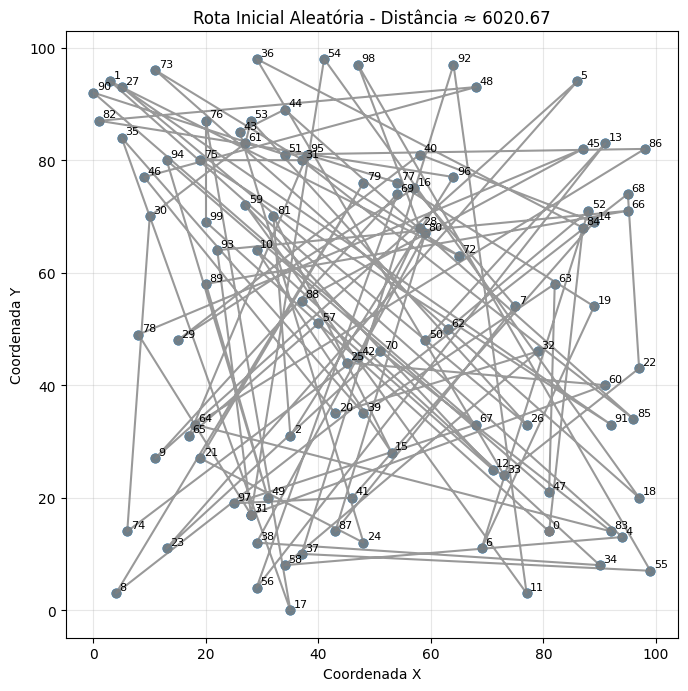

In [23]:
#plotar a rota inicial
plotar_geracao(geracao[-1], coordenadas_cidades, "Rota Inicial Aleatória", 'gray')

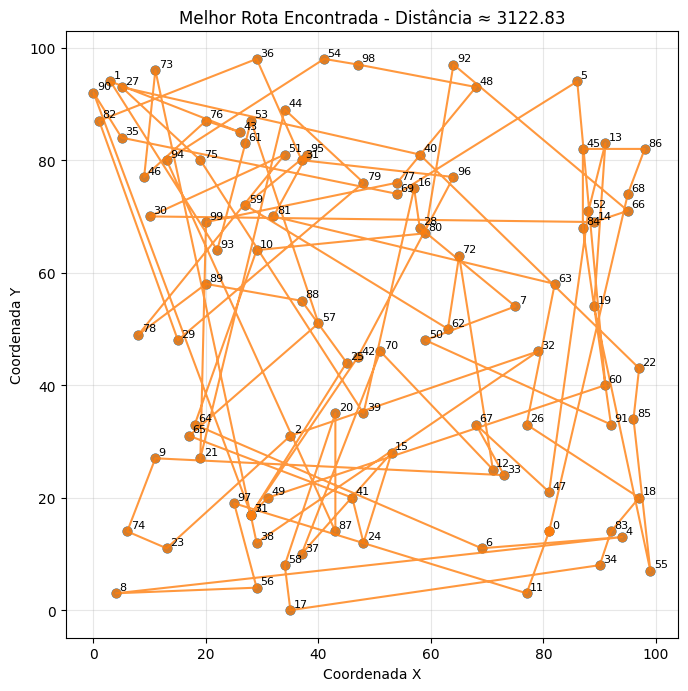

In [24]:
#plotar a melhor rota encontrada
plotar_geracao(geracao[0], coordenadas_cidades, "Melhor Rota Encontrada", 'tab:orange')

2) Compare a representação de dois modelos vetoriais  

Pegue um texto relativamente pequeno, o objetivo será visualizar a representação vetorial, que poderá 
ser um vetor por palavra ou por sentença. Seja qual for a situação, considere a quantidade de palavras ou 
sentenças onde tenha no mínimo duas similares e no mínimo 6 textos, que deverão produzir no mínimo 
6 vetores. Também limite o número máximo, para que a visualização fique clara e objetiva. 
 
O  trabalho  consiste  em  pegar  os  fragmentos  de  texto  e  codificá-las  na  forma  vetorial.  Após  obter  os 
vetores, imprima-os em figuras (plot) que demonstrem a projeção desses vetores usando a PCA. 
 
O PDF deverá conter o código-fonte e as imagens obtidas.

In [1]:
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, ClusterWarning
from warnings import simplefilter

from sentence_transformers import SentenceTransformer

#!pip install gensim
import gensim.downloader as api

In [2]:
#frases = [
#"Flamengo faz história e conquista o quarto título da Libertadores 2025.",
#"Em uma partida de tirar o fôlego, o Flamengo venceu o Palmeiras na final da Libertadores.",
#"O time do Flamengo mostrou grande organização tática durante toda a Libertadores.",
#"O Palmeiras criou várias chances, mas não conseguiu evitar a vitória do Flamengo.",
#"A torcida do Flamengo lotou o estádio e empurrou o time para mais um título da Libertadores.",
#"Em 2025, a decisão da Libertadores entre Flamengo e Palmeiras entrou para a história."
#]

# Trocando duas frases (1 e 4) para ver se no dendograma ficam próximas num mesmo contexto
# índice de 0 a 5
frases = [
"Flamengo faz história e conquista o quarto título da Libertadores 2025.",
"Muitos que vivem merecem a morte. E alguns que morrem merecem viver. Você pode dar-lhes vida? Então não seja tão ávido para julgar e condenar alguém à morte. Gandalf",
"Em uma partida de tirar o fôlego, o Flamengo venceu o Palmeiras na final da Libertadores.",
"O Palmeiras criou várias chances, mas não conseguiu evitar a vitória do Flamengo.",
"Não vou pedir que não chorem, pois nem todas as lágrimas são um mal. Gandalf.",
"Em 2025, a decisão da Libertadores entre Flamengo e Palmeiras entrou para a história."
]

# Usando SBERT
model_sbert = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

def vetor_sbert(frase):
    return model_sbert.encode(frase)

# Usando WORD2VEC gensim
model_w2v = api.load("word2vec-google-news-300")

def preprocess(texto):
    texto = texto.lower()
    # texto = re.sub(r'[^a-zA-Z0-9 ]', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto.split()

def vetor_w2v(frase):
    tokens = preprocess(frase)
    print("Tokens:", tokens)
    vetores = []

    for t in tokens:
        if t in model_w2v:
            vetores.append(model_w2v[t])

    if len(vetores) == 0:
        return np.zeros(300)

    return np.mean(vetores, axis=0)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


In [3]:
# Gegrando os vetores
vetores_sbert = np.array([vetor_sbert(f) for f in frases])
print(vetores_sbert.shape)
vetores_w2v   = np.array([vetor_w2v(f)   for f in frases])
print(vetores_w2v.shape)

(6, 384)
Tokens: ['flamengo', 'faz', 'história', 'e', 'conquista', 'o', 'quarto', 'título', 'da', 'libertadores', '2025']
Tokens: ['muitos', 'que', 'vivem', 'merecem', 'a', 'morte', 'e', 'alguns', 'que', 'morrem', 'merecem', 'viver', 'você', 'pode', 'darlhes', 'vida', 'então', 'não', 'seja', 'tão', 'ávido', 'para', 'julgar', 'e', 'condenar', 'alguém', 'à', 'morte', 'gandalf']
Tokens: ['em', 'uma', 'partida', 'de', 'tirar', 'o', 'fôlego', 'o', 'flamengo', 'venceu', 'o', 'palmeiras', 'na', 'final', 'da', 'libertadores']
Tokens: ['o', 'palmeiras', 'criou', 'várias', 'chances', 'mas', 'não', 'conseguiu', 'evitar', 'a', 'vitória', 'do', 'flamengo']
Tokens: ['não', 'vou', 'pedir', 'que', 'não', 'chorem', 'pois', 'nem', 'todas', 'as', 'lágrimas', 'são', 'um', 'mal', 'gandalf']
Tokens: ['em', '2025', 'a', 'decisão', 'da', 'libertadores', 'entre', 'flamengo', 'e', 'palmeiras', 'entrou', 'para', 'a', 'história']
(6, 300)


In [4]:
# reduzindo para 3D - PCA
def reduzir_3d(vetores):
    pca = PCA(n_components=3)
    return pca.fit_transform(vetores)

vetores_sbert_3d = reduzir_3d(vetores_sbert)
vetores_w2v_3d   = reduzir_3d(vetores_w2v)

In [5]:
# Gráficos (slides aula)
def plot_projecoes(vetores, titulo):
    centro = vetores.mean(axis=0)
    v_centro = vetores - centro

    # obter o plano para projeção ortogonal
    U, s, Vh = np.linalg.svd(v_centro)
    # print('Variancia: ', np.square(s) / np.square(s).sum() )
    W2 = Vh.T[:, :2]

    # v1_plano = Vh.T[:, 0]
    # v2_plano = Vh.T[:, 1]
    projetados2d = v_centro.dot(W2)
    # print(projetados2d)

    # 3D
    fig = plt.figure(figsize=(6, 3.8))
    ax = fig.add_subplot(111, projection='3d')
    #for v in vetores:
    for i, v in enumerate(vetores):  # com labels
        xs = np.linspace(0, v[0], 10)
        ys = np.linspace(0, v[1], 10)
        zs = np.linspace(0, v[2], 10)
        ax.plot(xs, ys, zs=zs)
        ax.text(v[0], v[1], v[2], str(i))

    ax.set_title("Projeção 3D - " + titulo)
    plt.show()

    # 2D
    fig = plt.figure(figsize=(6, 3.8))
    ax = fig.add_subplot(111)
    #for v in projetados2d:
    for i, v in enumerate(projetados2d): # com labels
        xs = np.linspace(0, v[0], 10)
        ys = np.linspace(0, v[1], 10)
        ax.plot(xs, ys)
        ax.text(v[0], v[1], str(i), fontsize=12)

    ax.grid(True)
    ax.set_title("Projeção PCA 2D - " + titulo)
    plt.show()

    return projetados2d

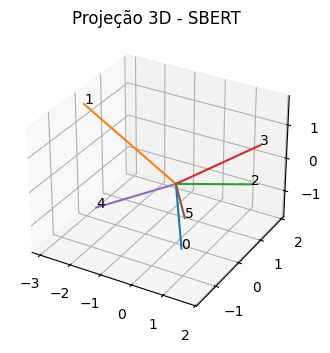

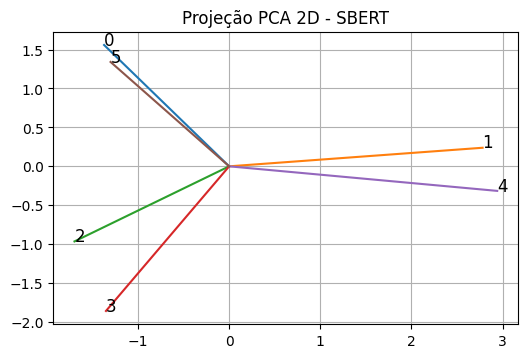

In [6]:
# Gráfico SBERT
proj_sbert_2d = plot_projecoes(vetores_sbert_3d, "SBERT")

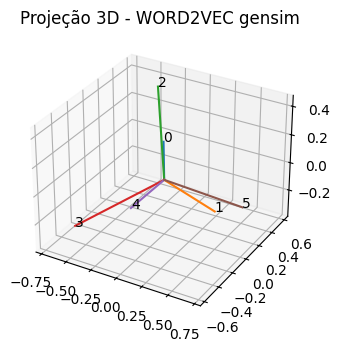

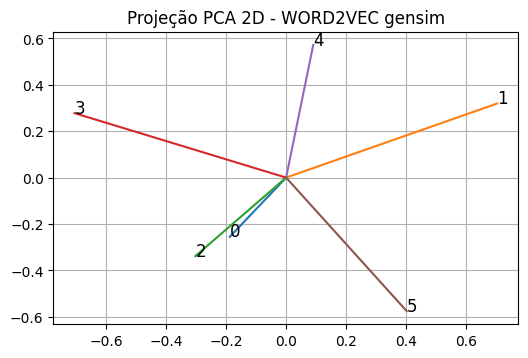

In [7]:
# Gráfico Gensim
proj_w2v_2d   = plot_projecoes(vetores_w2v_3d, "WORD2VEC gensim")

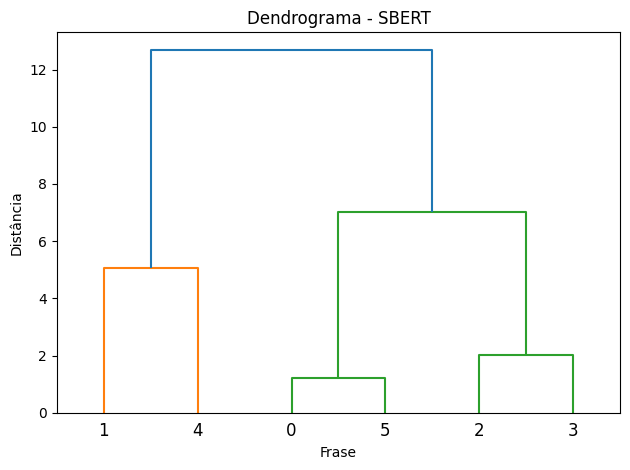

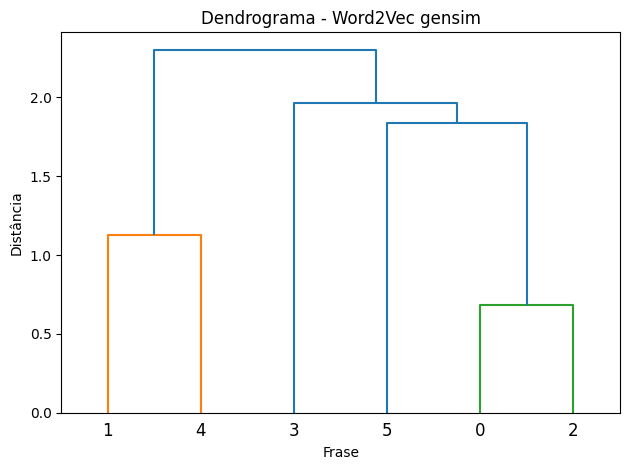

In [8]:
# Dendogramas
def vectorDistance(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

def calcDistance(mat):
    n = len(mat)
    res = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                res[i][j] = vectorDistance(mat[i], mat[j])
    return res

simplefilter("ignore", ClusterWarning)

for nome, vetor in [("SBERT", vetores_sbert_3d), ("Word2Vec gensim", vetores_w2v_3d)]:
    d = calcDistance(vetor)
    Z = linkage(d, method='ward', metric='euclidean')
    plt.figure()
    dendrogram(Z)
    plt.title("Dendrograma - " + nome)
    plt.xlabel("Frase")
    plt.ylabel("Distância")
    plt.tight_layout()
    plt.show()